## Importing essential libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# Set the maximum number of columns to display in the output
pd.set_option('display.max_columns', 50)

# Set the plot style
plt.style.use('bmh')

# Extract color palette for cycling through plot colors
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(color_pal)

# Now the rest of your code can follow


## Loading the datasets

In [2]:
calender = pd.read_csv('/kaggle/input/m5-dataset/calendar.csv')
sales_tr_ev = pd.read_csv('/kaggle/input/m5-dataset/sales_train_evaluation.csv')
sales_tr_val = pd.read_csv('/kaggle/input/m5-dataset/sales_train_validation.csv')
sample_sub = pd.read_csv('/kaggle/input/m5-dataset/sample_submission.csv')
sell_price = pd.read_csv('/kaggle/input/m5-dataset/sell_prices.csv')

###  Visualising the sales for a specific item to understand the trend

In [3]:
d_cols=[c for c in sales_tr_val.columns if 'd_' in c]

# Filter the data for a specific item
filtered_data = sales_tr_val.loc[sales_tr_val['id'] == 'FOODS_3_090_CA_3_validation']

# Set the 'id' as the index and select only the sales data columns (those starting with 'd_')
sales_data = filtered_data.set_index('id')[d_cols]
sales_data

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FOODS_3_090_CA_3_validation,108,132,102,120,106,123,279,175,186,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,156,133,114,80,75,113,81,107,160,124,107,84,88,90,129,160,204,86,100,88,77,141,139,130


In [4]:
# Transpose the data so that the 'd_' columns become the index and the sales data becomes a Series
sales_series = sales_data.T.squeeze()
sales_series

d_1       108
d_2       132
d_3       102
d_4       120
d_5       106
         ... 
d_1909     88
d_1910     77
d_1911    141
d_1912    139
d_1913    130
Name: FOODS_3_090_CA_3_validation, Length: 1913, dtype: int64

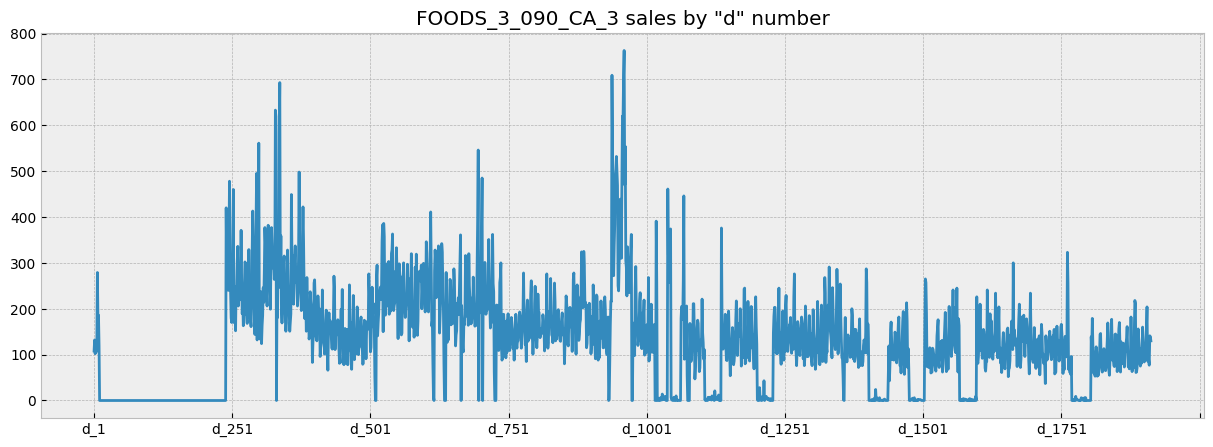

In [5]:
# Now plotting the data
sales_series.plot(figsize=(15, 5), title='FOODS_3_090_CA_3 sales by "d" number', color=next(color_cycle))
plt.show()

In [6]:
# List of item ids for which we want to analyze sales
ids = ['FOODS_3_090_CA_3_validation', 'HOBBIES_1_004_CA_1_validation', 
       'HOBBIES_1_003_CA_1_validation', 'HOBBIES_1_001_CA_1_validation'] 

In [7]:
examples = []

for item_id in ids:
    # Extract sales data for the item
    data = sales_tr_val.loc[sales_tr_val['id'] == item_id][d_cols].T
    
    # Rename the sales column to match the item ID
    data = data.rename(columns={data.columns[0]: item_id})
    
    # Convert the index to a regular column named 'd'
    data = data.reset_index().rename(columns={'index': 'd'})
    
    # Merge with calendar data to get actual dates
    data = data.merge(calender, on='d')
    
    examples.append(data)

In [9]:
examples[0]

,d,FOODS_3_090_CA_3_validation,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,108,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,132,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,102,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,120,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,106,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,d_1909,88,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,d_1910,77,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,d_1911,141,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,d_1912,139,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


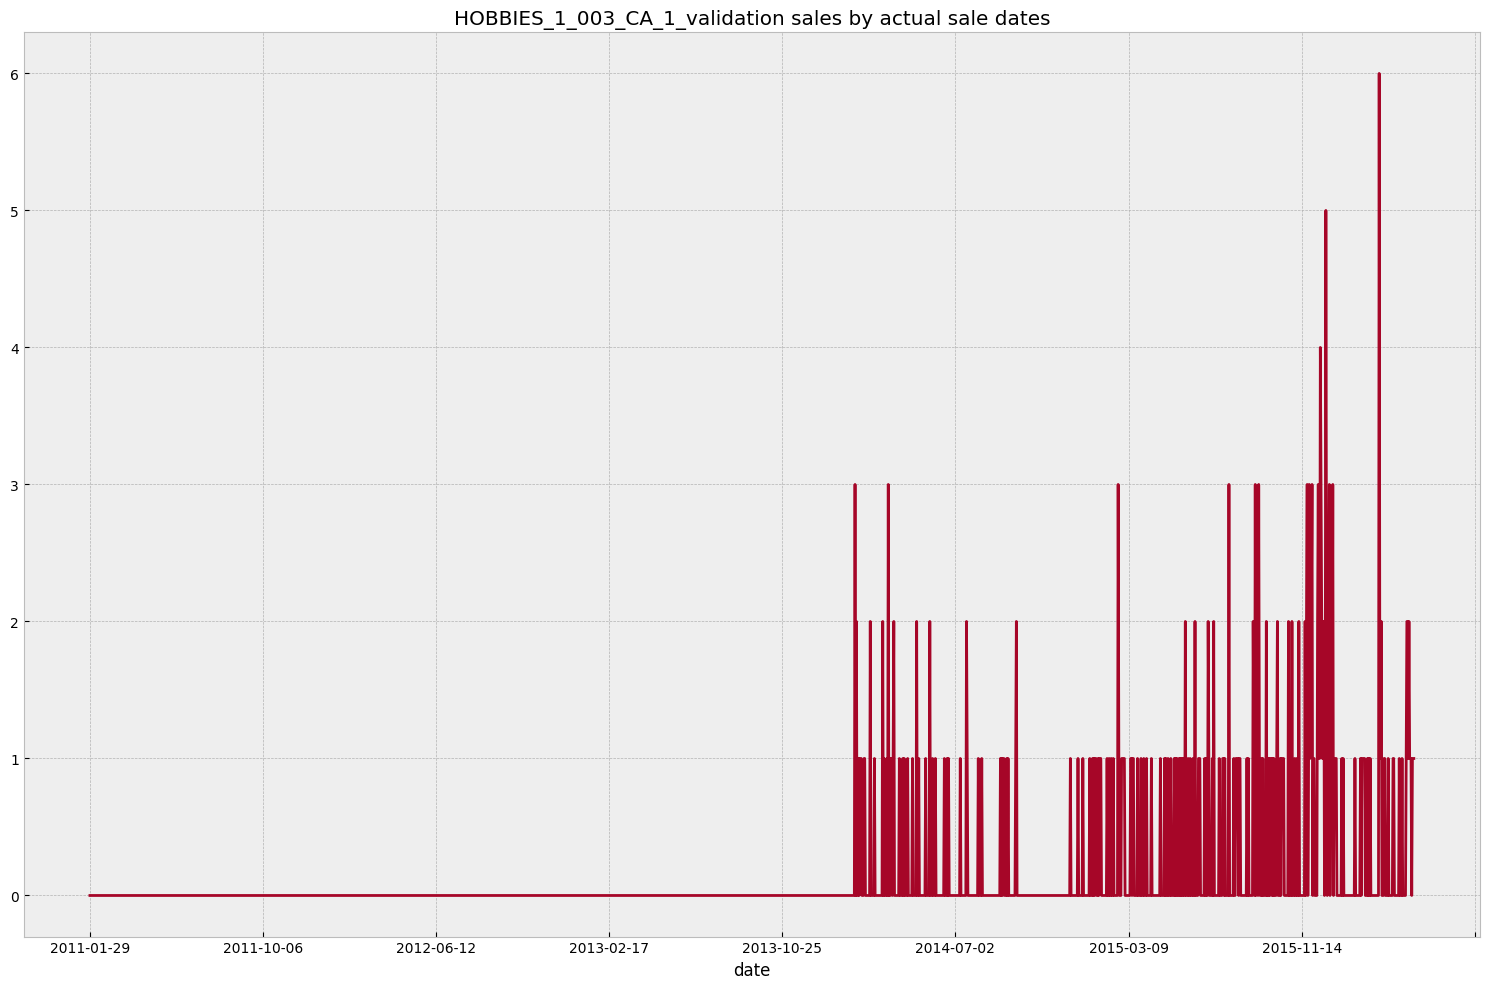

In [11]:
graph_ids = [2]  # Only plot the third item in the list

fig, ax = plt.subplots(figsize=(15, 10))  # Create a plot

# For each item ID to plot:
for graph_id in graph_ids:
    # Store the Series in a variable before plotting
    sales_series_2 = examples[graph_id].set_index('date')[ids[graph_id]]
    
    # Now plot the sales_series
    sales_series_2.plot(
        ax=ax, color=next(color_cycle), title=f'{ids[graph_id]} sales by actual sale dates')

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()  # Display the plot

In [12]:
# Return Mean absolute deviation value
def maddest(d, axis=None):
    return np.mean(np.absolute(d-np.mean(d,axis)), axis)

# Denoise the signal
def denoise(x, wavelet='db4',level=1):
    coeff = pywt.wavedec(x,wavelet,mode='per')
    sigma=(1/0.6745)*maddest(coeff[-level])
    
    uthresh=sigma*np.sqrt(2*np.log(len(x)))
    coeff[1:]=(pywt.threshold(i,value=uthresh,mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff,wavelet,mode='per')

In [13]:
def list_to_df(list_obj):
    return pd.Series(list_obj)

import pywt

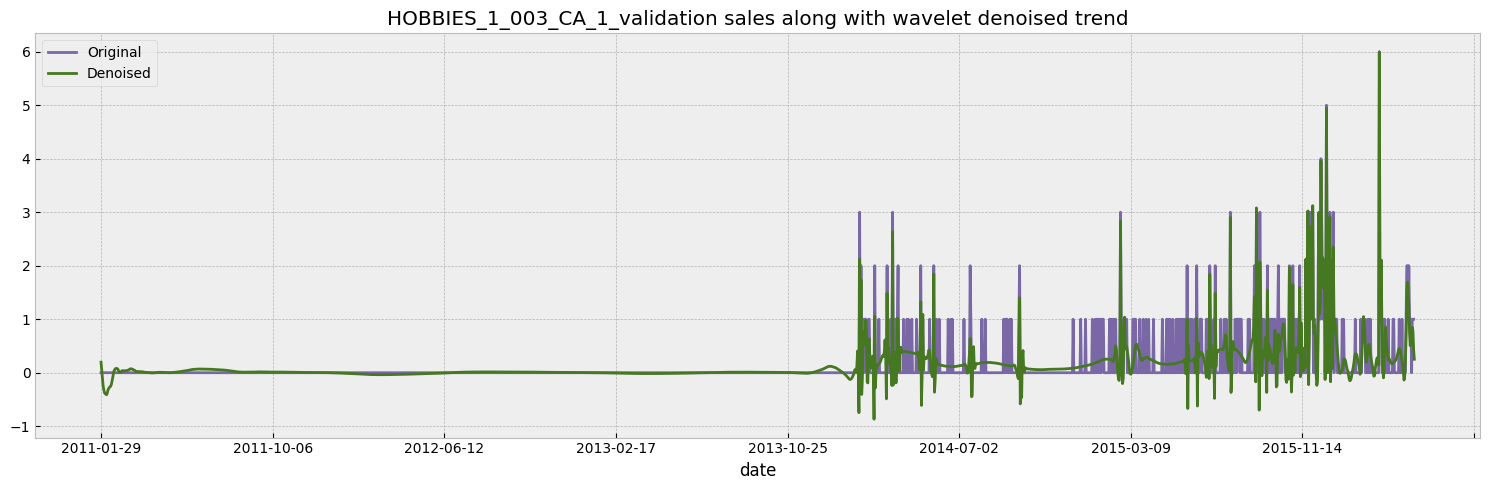

In [14]:
fig, axs = plt.subplots(len(graph_ids), 1, figsize=(15, 10)) 
if len(graph_ids) != 1 : axs = axs.flatten() 

ax_id = 0
for graph_id in graph_ids:
    # Original data
    original_series = examples[graph_id].set_index('date')[ids[graph_id]]
    original_series.plot(figsize=(15, 5), color=next(color_cycle), label='Original',
                         title=f'{ids[graph_id]} sales along with wavelet denoised trend', 
                         ax=axs[ax_id] if len(graph_ids) != 1 else axs)
    
    # Denoised data
    denoised_series = list_to_df(denoise(original_series))
    denoised_series.plot(figsize=(15, 5), color=next(color_cycle), label='Denoised',
                         ax=axs[ax_id] if len(graph_ids) != 1 else axs)
    
    axs[ax_id].legend() if len(graph_ids) != 1 else axs.legend()
    ax_id += 1
    
plt.tight_layout()
plt.show()

In [16]:
train_dataset = sales_tr_val[d_cols[-100:-30]]  # Training set
val_dataset = sales_tr_val[d_cols[-30:]]  # Validation set

In [17]:
train_dataset.shape

(30490, 70)

In [18]:
val_dataset.shape

(30490, 30)

## Moving average Forecasting

In [19]:
def moving_average(window=30, forecast_days=28):
    # Predictions for the validation set
    predictions = []
    for i in range(0, len(val_dataset.columns)):
        if i == 0:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window:]].values, axis=1))
        elif i > 0 and i <= window:
            predictions.append(np.mean(train_dataset[train_dataset.columns[-window+i:]].values, axis=1) + np.mean(val_dataset[val_dataset.columns[:i]].values, axis=1))
        else:
            predictions.append(np.mean(val_dataset[val_dataset.columns[i-window:i]].values, axis=1))
    
    # Forecasting future values after validation period
    forecast_predictions = []
    last_window_data = val_dataset[val_dataset.columns[-window:]].values
    for i in range(forecast_days):
        next_prediction = np.mean(last_window_data[:, -window:], axis=1)
        forecast_predictions.append(next_prediction)
        last_window_data = np.hstack((last_window_data[:, 1:], next_prediction[:, np.newaxis]))

    predictions = np.transpose(np.array([list(row) for row in predictions]))
    forecast_predictions = np.transpose(np.array([list(row) for row in forecast_predictions]))

    error_norm = np.linalg.norm(predictions[:3] - val_dataset[:3] / len(predictions[0]))

    return predictions, forecast_predictions, float(error_norm)

# Recalculate predictions and error
pred, forecast_pred, error_moving = moving_average()

In [21]:
pred.shape

(30490, 30)

In [22]:
forecast_pred.shape

(30490, 28)

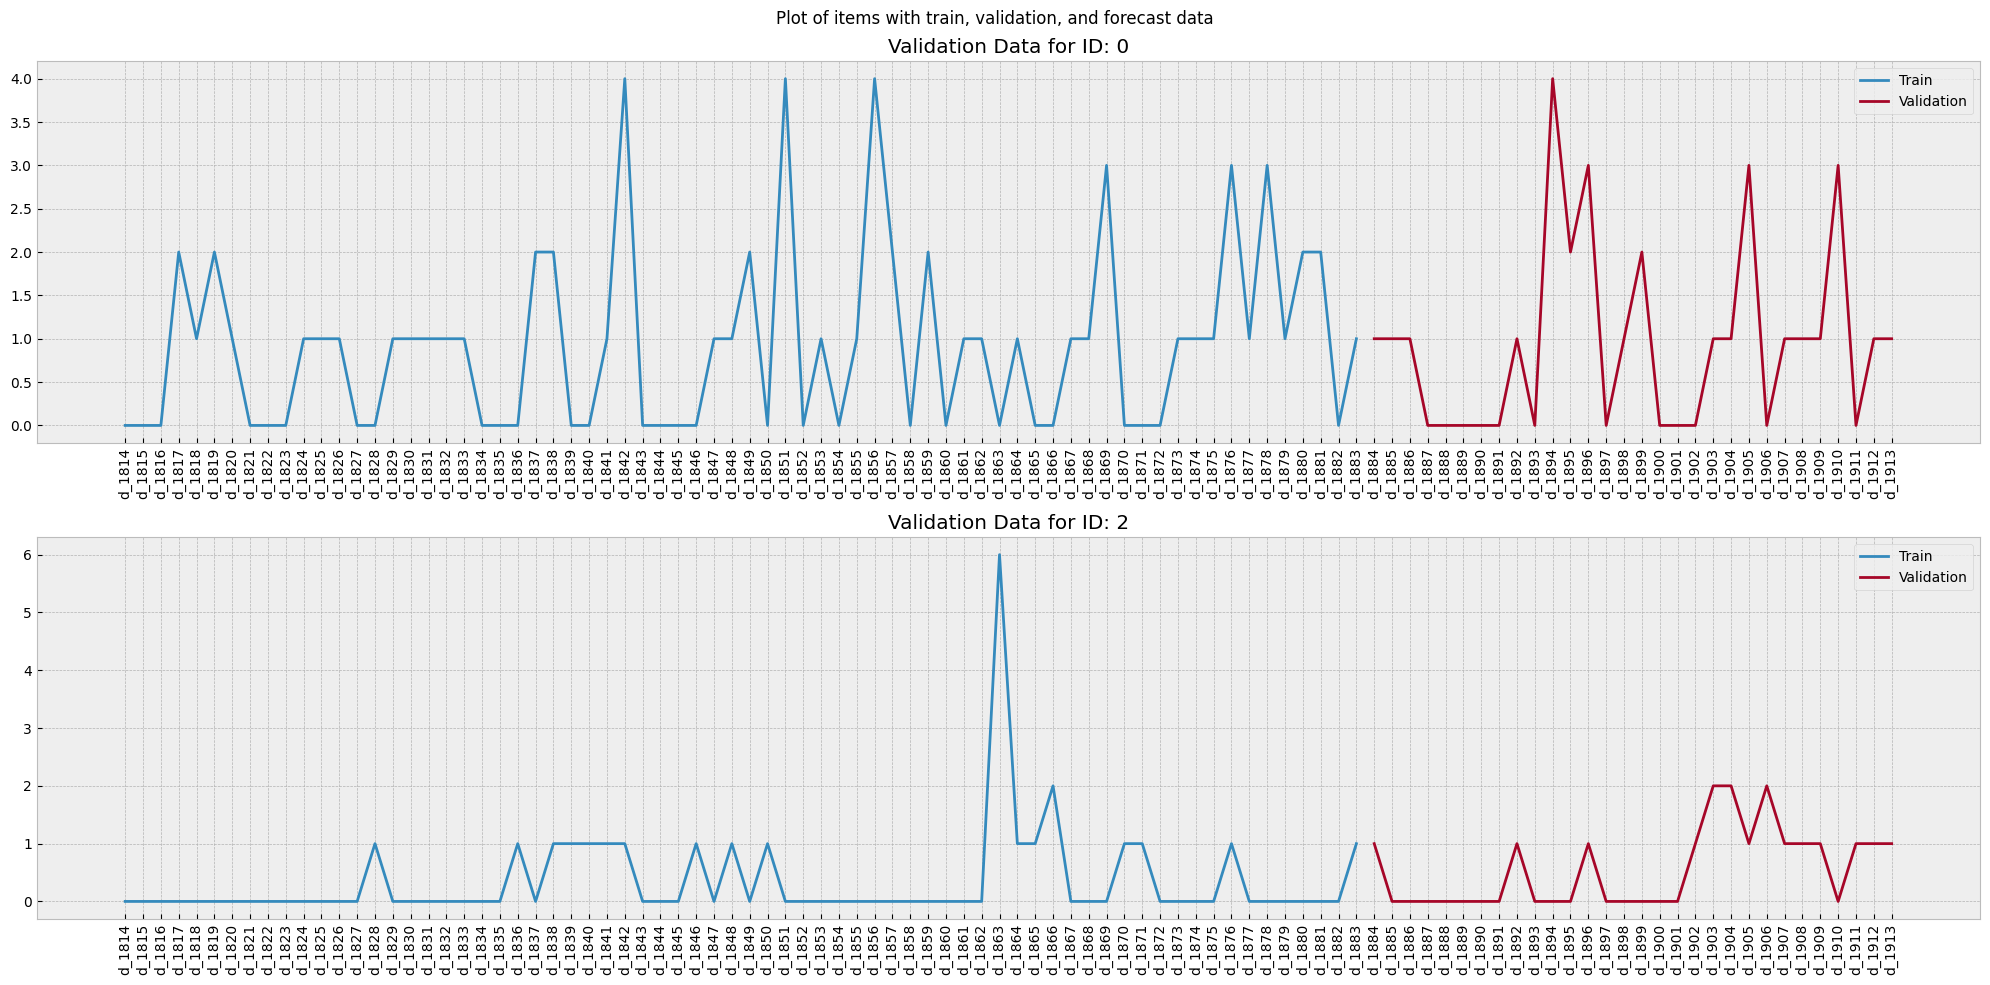

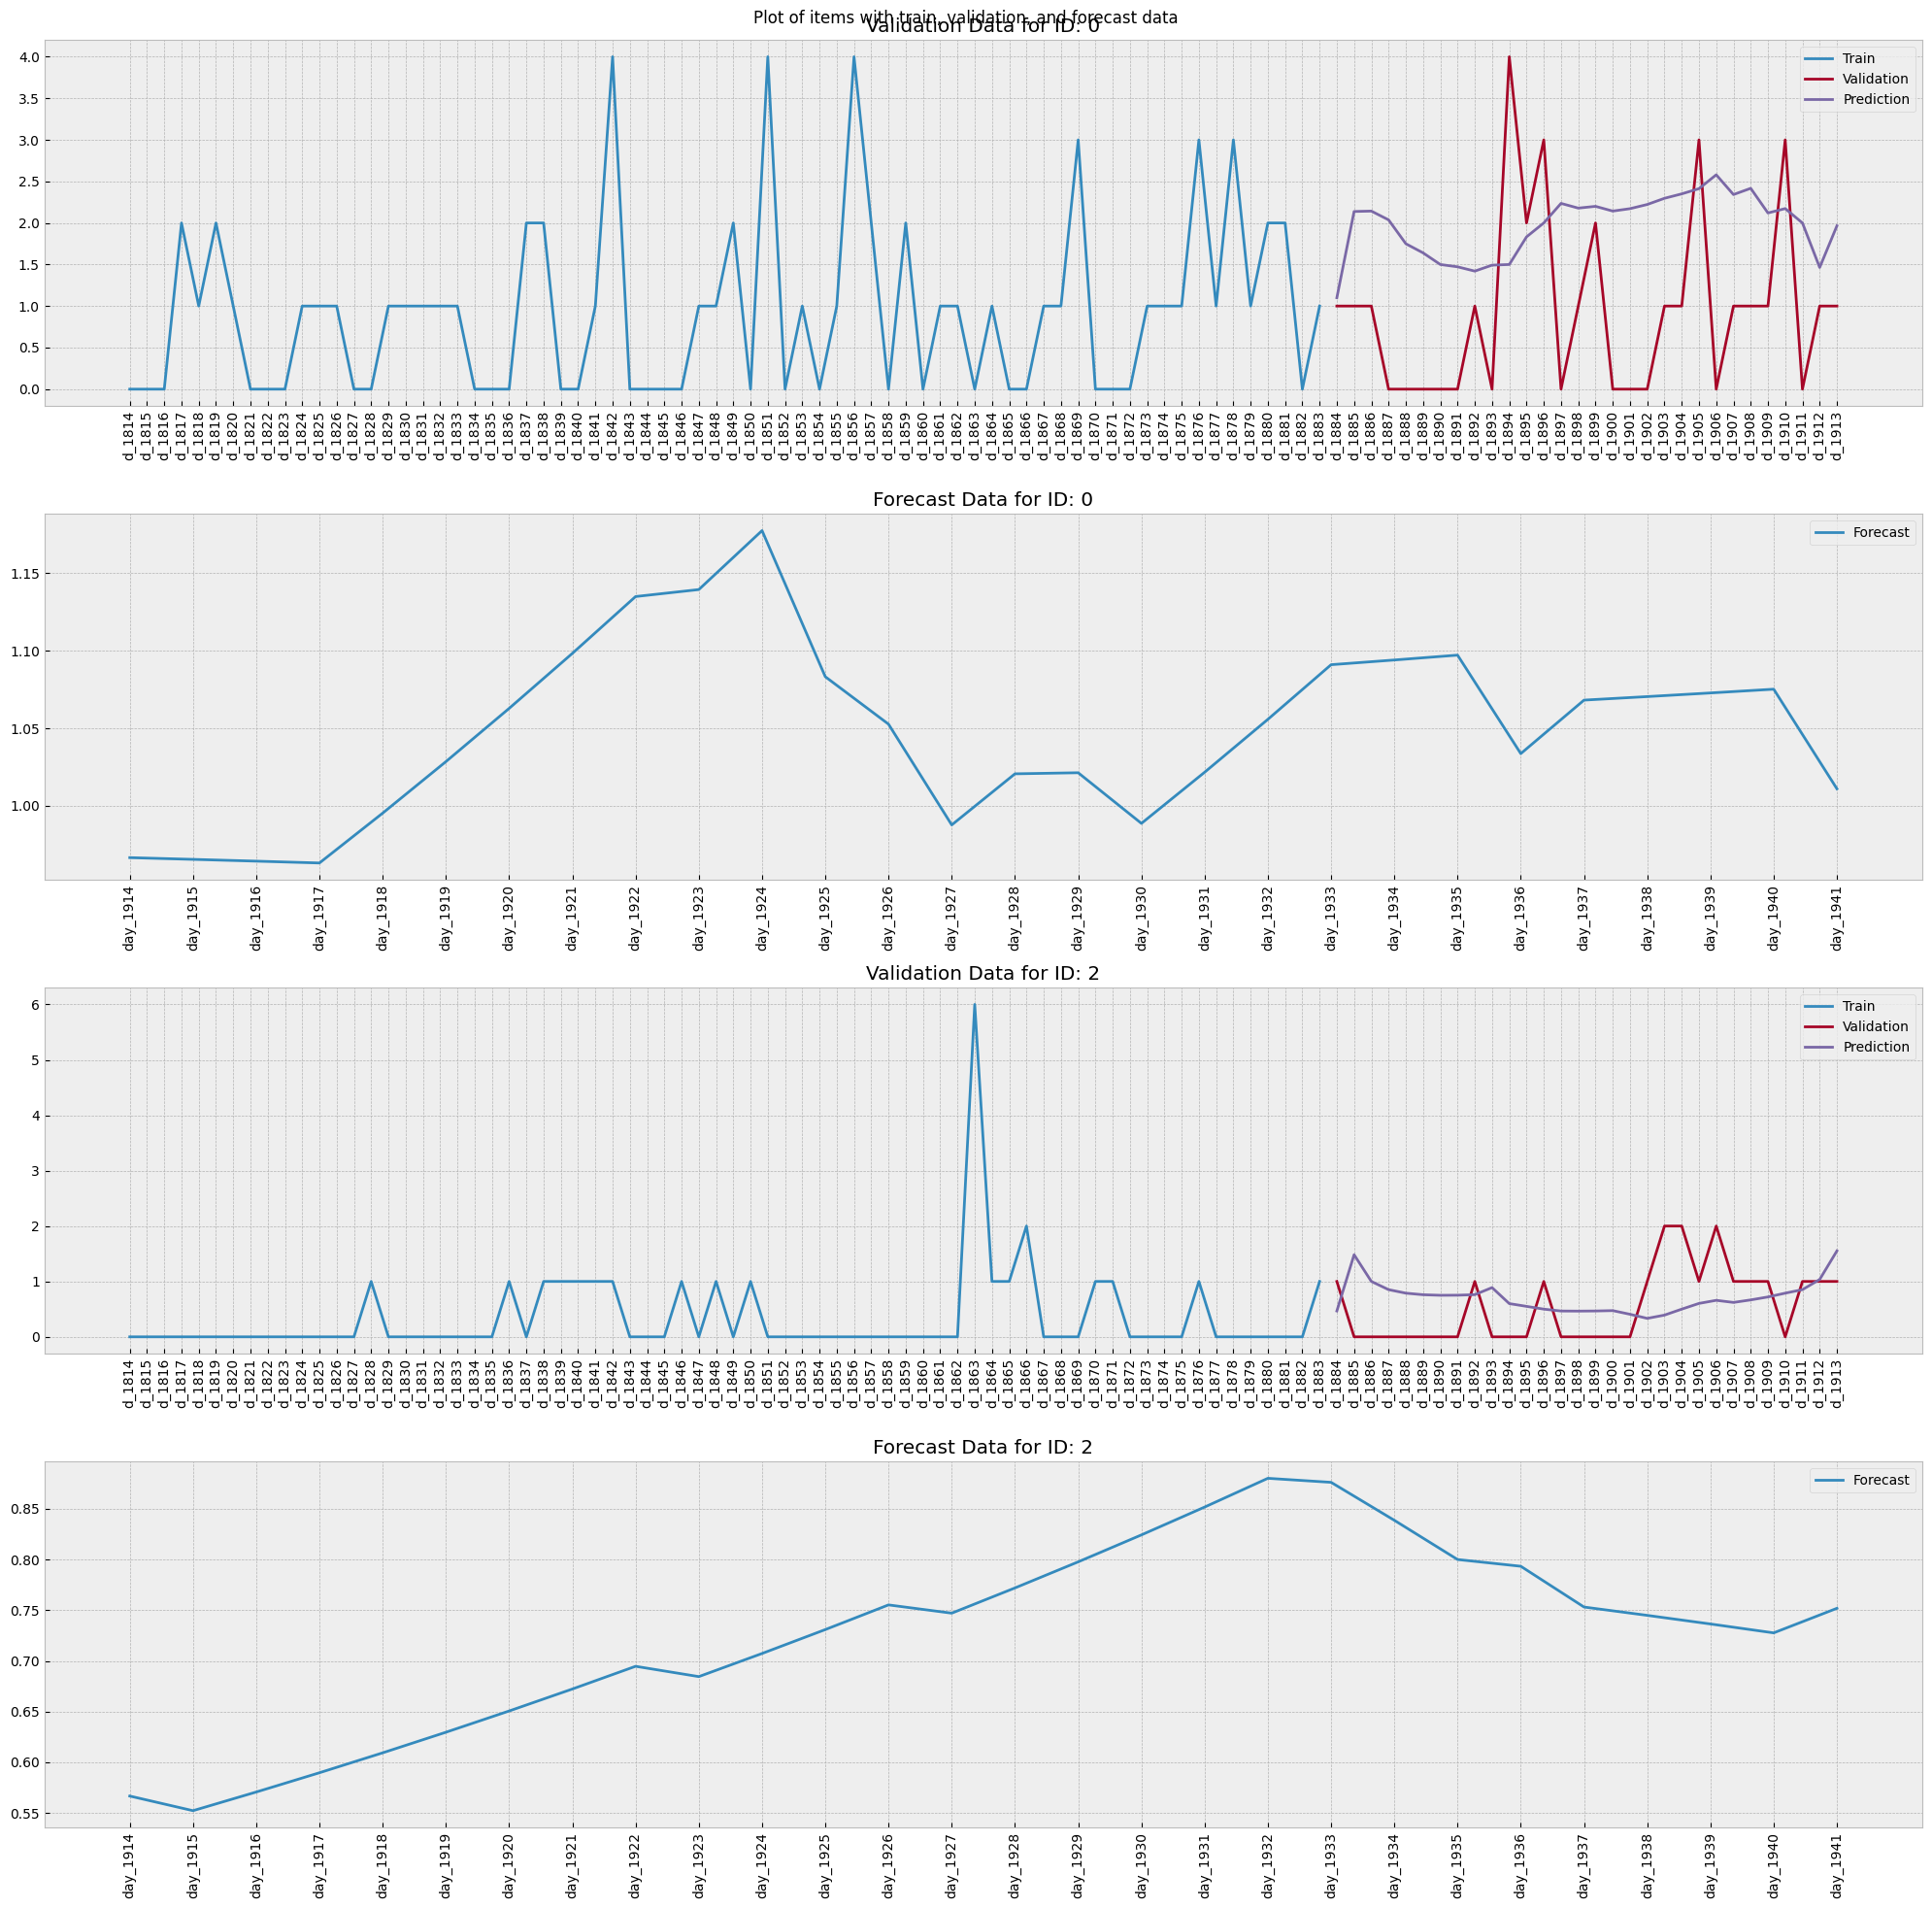

In [23]:
# Utility function to plot graph
def plot_graphs4(ids=[0, 2], pred=None, forecast_pred=None, pred_value=False):
    num_rows = len(ids)
    if pred_value:
        num_rows *= 2  # Double the rows if plotting predictions and forecasts
    
    fig, axs = plt.subplots(num_rows, 1, figsize=(20, 5 * num_rows))

    if len(ids) == 1:
        axs = [axs]  # Ensure axs is a list even for a single subplot

    for idx, i in enumerate(ids):
        # Plotting validation data
        axs[2*idx if pred_value else idx].plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values, label='Train')
        axs[2*idx if pred_value else idx].plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values, label='Validation')
        if pred_value and pred is not None:
            axs[2*idx].plot(list(val_dataset.loc[i].keys()), pred[i], label='Prediction')
        axs[2*idx if pred_value else idx].tick_params(axis='x', rotation=90)
        axs[2*idx if pred_value else idx].set_title(f'Validation Data for ID: {i}')
        axs[2*idx if pred_value else idx].legend()

        # Plotting forecast data
        if pred_value and forecast_pred is not None:
            future_dates = [f"day_{len(d_cols) + j + 1}" for j in range(forecast_pred.shape[1])]
            axs[2*idx + 1].plot(future_dates, forecast_pred[i], label='Forecast')
            axs[2*idx + 1].tick_params(axis='x', rotation=90)
            axs[2*idx + 1].set_title(f'Forecast Data for ID: {i}')
            axs[2*idx + 1].legend()

    plt.suptitle('Plot of items with train, validation, and forecast data')
    plt.tight_layout()
    plt.show()

# Example call for only training and validation data
ids = [0, 2]
plot_graphs4(ids)  # This will plot only training and validation data

# Example call with predictions and forecast data
plot_graphs4(ids, pred, forecast_pred, pred_value=True)  # This will plot train, validation, predictions, and forecast


In [24]:
error_moving

12.206935492097351

## Check for stationarity

In [25]:
# Testing for stationarity using dickey fuller's test
from statsmodels.tsa.stattools import adfuller

In [26]:
def adfuller_test(val):
    result = adfuller(val)
    labels = ['ADF test statistics', 'p-value', '#Lags used', 'No of observations used']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1] <= 0.05:
        print('Stationary')
    else:
        print('Non-stationary')

In [29]:
first_row = train_dataset.iloc[0]
adfuller_test(first_row)

#adfuller_test(train_dataset[train_dataset.columns[-30:]].values[2:3][0])

ADF test statistics:-8.2633841867922
p-value:5.013077478701456e-13
#Lags used:0
No of observations used:69
Stationary


In [30]:
'''
# Differencing to make it stationary
example = (train_dataset[train_dataset.columns[-30:]].loc[2]).reset_index()
example.columns = ['index', 'sales']

# Number by which the seasonality is present, if the seasonal cycle is 1 cycle in 12 months then, we pass 12 
example['seasonal first difference'] = example['sales'] - example['sales'].shift(7) #For us it is 7 
#print(example)
adfuller_test(example['seasonal first difference'].dropna())
example['seasonal first difference'].plot()
plt.show()'''

"\n# Differencing to make it stationary\nexample = (train_dataset[train_dataset.columns[-30:]].loc[2]).reset_index()\nexample.columns = ['index', 'sales']\n\n# Number by which the seasonality is present, if the seasonal cycle is 1 cycle in 12 months then, we pass 12 \nexample['seasonal first difference'] = example['sales'] - example['sales'].shift(7) #For us it is 7 \n#print(example)\nadfuller_test(example['seasonal first difference'].dropna())\nexample['seasonal first difference'].plot()\nplt.show()"

In [34]:
'''
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(example['seasonal first difference'].dropna(),ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(example['seasonal first difference'].dropna(),ax=ax2)'''

"\nimport statsmodels.api as sm\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf\nfig = plt.figure(figsize=(12,8))\nax1=fig.add_subplot(211)\nfig = sm.graphics.tsa.plot_acf(example['seasonal first difference'].dropna(),ax=ax1)\nax2=fig.add_subplot(212)\nfig = sm.graphics.tsa.plot_pacf(example['seasonal first difference'].dropna(),ax=ax2)"

## ARIMA

In [37]:
import warnings

def arima(forecast_days=28, seasonal_order=(1, 0, 1, 7)):
    warnings.filterwarnings("ignore", message="Maximum Likelihood optimization failed to converge. Check mle_retvals")
    # Predictions for the validation set
    predictions = []
    for i in range(len(val_dataset.columns)):
        model_data = np.hstack((train_dataset.values[0], val_dataset[val_dataset.columns[:i]].values[0]))
        #model_data = np.hstack((train_dataset.values[2], val_dataset[val_dataset.columns[:i]].values[2]))
        fit = sm.tsa.statespace.SARIMAX(model_data, seasonal_order=seasonal_order).fit(disp=False)
        predictions.append(fit.forecast(1))
    
    # Forecasting future values after validation period
    forecast_predictions = []
    model_data = np.hstack((train_dataset.values[0], val_dataset.values[0]))
    #model_data = np.hstack((train_dataset.values[2], val_dataset.values[2]))
    for i in range(forecast_days):
        fit = sm.tsa.statespace.SARIMAX(model_data, seasonal_order=seasonal_order).fit(disp=False)
        next_prediction = fit.forecast(1)
        forecast_predictions.append(next_prediction)
        model_data = np.append(model_data, next_prediction)
    
    predictions = np.array(predictions).reshape(-1, len(val_dataset.columns))
    forecast_predictions = np.array(forecast_predictions).reshape(-1, forecast_days)
    
    error_norm = np.linalg.norm(predictions[:3] - val_dataset[:3] / len(predictions[0]))
    
    return predictions, forecast_predictions, float(error_norm)

# Recalculate predictions and error
pred_arima, forecast_pred_arima, error_arima = arima()


In [41]:
pred_arima.shape

(1, 30)

In [42]:
forecast_pred_arima.shape

(1, 28)

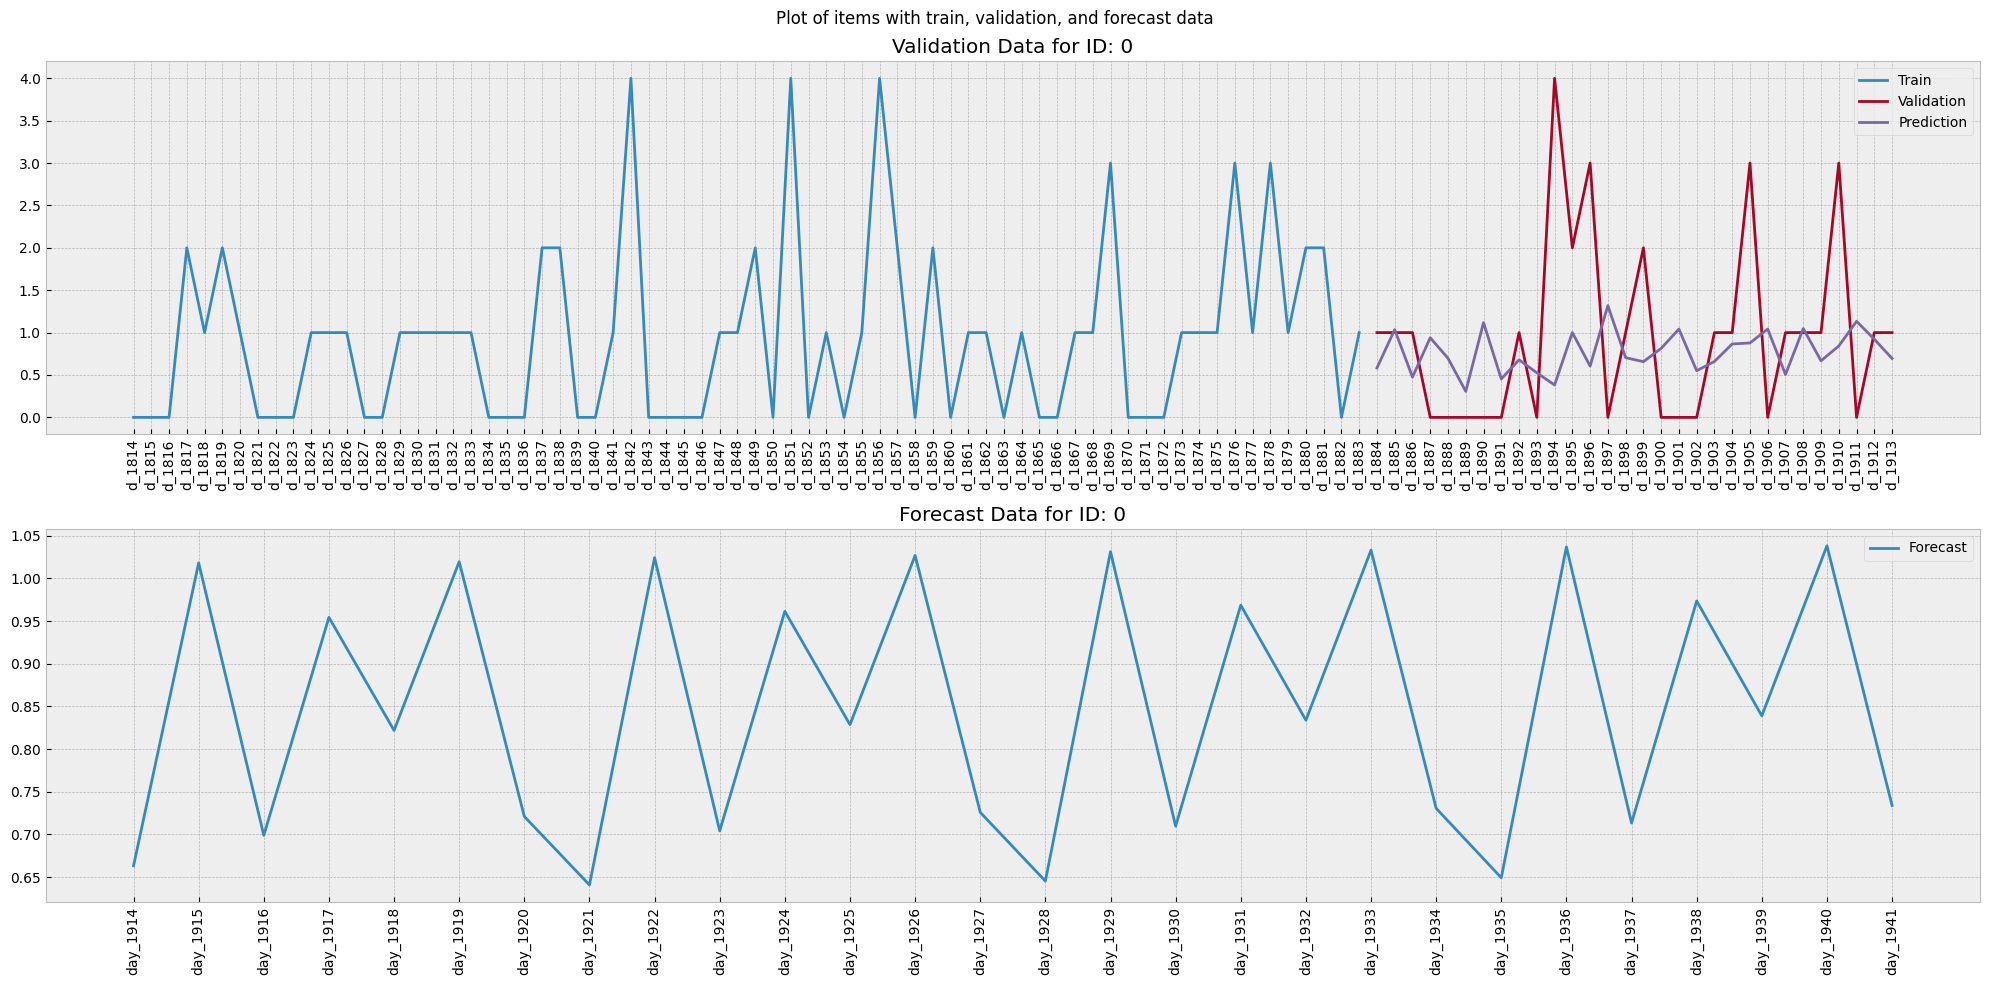

In [38]:
# Utility function to plot graph
def plot_graphs5(ids=[0, 2], pred=None, forecast_pred=None, pred_value=False):
    num_rows = len(ids)
    if pred_value:
        num_rows *= 2  # Double the rows if plotting predictions and forecasts
    
    fig, axs = plt.subplots(num_rows, 1, figsize=(20, 5 * num_rows))

    if num_rows == 1:
        axs = [axs]  # Ensure axs is a list even for a single subplot

    for idx, i in enumerate(ids):
        # Plotting validation data
        ax = axs[2 * idx if pred_value else idx]
        ax.plot(list(train_dataset.loc[i].keys()), train_dataset.loc[i].values, label='Train')
        ax.plot(list(val_dataset.loc[i].keys()), val_dataset.loc[i].values, label='Validation')
        if pred_value and pred is not None:
            ax.plot(list(val_dataset.loc[i].keys()), pred[i], label='Prediction')
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(f'Validation Data for ID: {i}')
        ax.legend()

        # Plotting forecast data
        if pred_value and forecast_pred is not None:
            ax_forecast = axs[2 * idx + 1]
            future_dates = [f"day_{len(d_cols) + j + 1}" for j in range(forecast_pred.shape[1])]
            ax_forecast.plot(future_dates, forecast_pred[i], label='Forecast')
            ax_forecast.tick_params(axis='x', rotation=90)
            ax_forecast.set_title(f'Forecast Data for ID: {i}')
            ax_forecast.legend()

    plt.suptitle('Plot of items with train, validation, and forecast data')
    plt.tight_layout()
    plt.show()


ids = [0]
#plot_graphs4(ids)  # This will plot only training and validation data

# Example call with predictions and forecast data
plot_graphs5(ids, pred_arima, forecast_pred_arima, pred_value=True)  # This will plot train, validation, predictions, and forecast


In [39]:
error_arima

7.530314244690613